In [24]:
### total flow plots ###
### DTT, 10/22

# This script is split into two main parts: 1) reading in CONUS2 gridded total (aggregated) daily flow for the full domain and creating a dataframe of CONUS2 flow for cells that have been matched with USGS gages in the `NWM_Gage_Adjustments_final.csv`. 2) matching the gages that both have flow between the PF csv and USGS csv retrieved from hydrodata. 
# Note that flow is converted in this script from daily accumulated flow in [m^3/h] to daily mean flow in cms or [m^3/s].

### Inputs:
# - `NWM_Gage_Adjustments_final.csv` - this can be found on the CONUS2 Dropbox or in /glade/p/univ/ucsm0002/CONUS2/domain_files
# - Daily total streamflow PFCLM outputs as PFBs - processed using `compute_daily_PF_averages.py`
# - USGS daily flow csv - from the hydrodata repository on Verde

### Outputs:
# - CSV of PFCLM daily mean flow (cms) with gage ID, lat/long, and CONUS2 cell location
# - two flow-matched CSVs for PF and USGS flow
# - note that the CSV outputs with 'day 001' which starts at the water year (001 == October 1)***

# Notes:
# - need to fix the no_days, currently this will only be accurate if this is started at the begninning of a water year and need to add in some dictionary or if statement to specify num days in a month or something like that.
# - ***need to change day headings so that they are more descriptive than 'day 001' and have an actual date

import sys
from parflow.tools.io import read_pfb,write_pfb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# need to change water year and number of days
water_year = 2003
no_days = 31 

# Directory where PF flow PFBs are saved in
directory_out = '/glade/scratch/tijerina/CONUS2/spinup_WY2003/averages'
organized_dir = '/glade/p/univ/ucsm0002/CONUS2/Validation/Streamflow/Organized_Daily_Flow'
plot_dir = '/glade/p/univ/ucsm0002/CONUS2/Validation/Streamflow/Figures'

#usgs_data = 'USGS_WY2003_oct_mean_flow_HydroData.csv' #csv of USGS flow from hydrodata




# Average Flow Comparison
Right now, this is just monthly (Oct WY2003), but eventually it should be annual average flow comparison 

In [2]:
usgs_daily_flow = pd.read_csv(f'{organized_dir}/USGS_daily_FlowMatch_cms_2003.csv',index_col=['site_id'])
CONUS2_daily_flow = pd.read_csv(f'{organized_dir}/CONUS2_daily_FlowMatch_cms_2003.csv',index_col=['site_id'])
CONUS2_daily_flow = CONUS2_daily_flow.drop(columns=['USGS_lat', 'USGS_lon', 'x_new_adj', 'y_new_adj'])

usgs_daily_flow

,2002-10-01,2002-10-02,2002-10-03,2002-10-04,2002-10-05,2002-10-06,2002-10-07,2002-10-08,2002-10-09,2002-10-10,...,2002-10-22,2002-10-23,2002-10-24,2002-10-25,2002-10-26,2002-10-27,2002-10-28,2002-10-29,2002-10-30,2002-10-31
site_id,,,,,,,,,,,,,,,,,,,,,
1011000,7.414600,7.386300,6.990100,6.565600,6.367500,6.19770,5.744900,5.065700,4.528000,4.414800,...,9.310700,8.574900,8.546600,8.631500,9.820100,12.508600,15.508400,16.527200,15.791400,14.319800
1013500,3.509200,3.424300,3.169600,3.113000,3.339400,2.85830,2.858300,2.631900,2.405500,2.504550,...,5.263800,5.405300,5.660000,5.914700,6.197700,6.990100,7.556100,7.301400,7.188200,7.273100
1015800,6.707100,6.226000,5.716600,5.377000,5.150600,5.03740,4.754400,4.499700,4.160100,4.188400,...,22.300400,19.074200,16.725300,14.914100,13.725500,12.904800,12.848200,13.725500,13.725500,13.074600
1017000,9.876700,9.367300,8.461700,7.952300,7.810800,7.13160,7.046700,6.678800,6.282600,6.282600,...,38.205000,33.394000,28.583000,24.507800,21.762700,20.376000,20.715600,21.791000,21.734400,20.347700
1017550,0.023772,0.024338,0.020659,0.018395,0.019810,0.01981,0.018678,0.018678,0.018961,0.021791,...,0.044997,0.036790,0.036224,0.035092,0.030847,0.041884,0.051789,0.039620,0.031979,0.027451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214657975,0.015848,0.014716,0.014716,0.014150,0.012735,0.01132,0.012735,0.015282,0.016414,0.019527,...,0.073297,0.030564,0.026885,0.027451,0.030564,0.028300,0.141500,0.079523,0.054336,0.043865
242354750,0.882960,0.755610,0.642410,0.588640,0.537700,0.52072,6.480700,2.363050,1.417830,1.092380,...,0.667880,0.608450,0.577320,0.554680,0.554680,0.543360,1.313120,1.652720,1.426320,1.075400
344894205,0.718820,0.585810,0.486760,0.424500,0.396200,0.34809,0.305640,0.283000,0.272246,0.273944,...,0.452800,0.407520,0.373560,0.370730,0.399030,0.370730,0.582980,0.795230,1.058420,0.911260


In [3]:
CONUS2_daily_flow

,day 001,day 002,day 003,day 004,day 005,day 006,day 007,day 008,day 009,day 010,...,day 022,day 023,day 024,day 025,day 026,day 027,day 028,day 029,day 030,day 031
site_id,,,,,,,,,,,,,,,,,,,,,
1011000,4.339120,3.903565,3.598231,3.739801,3.472192,2.964904,2.711756,2.519148,2.262331,2.004412,...,8.415931,9.427277,9.732380,19.499970,22.328073,21.454524,17.873519,15.879472,14.244763,12.567175
1013500,2.607411,2.592114,2.714427,2.122667,2.426324,1.780095,1.482548,1.307613,1.202425,1.285236,...,10.531182,10.841114,10.288957,10.600749,12.061306,16.507953,16.798331,14.819481,13.234019,11.639035
1015800,3.538157,3.513982,3.389648,3.025167,2.979538,2.794375,2.514015,2.242985,2.058773,2.187055,...,23.623506,33.084342,38.403587,35.184230,30.383635,27.200526,22.780802,20.339741,18.833875,17.107330
1017000,8.474701,8.578840,8.433320,8.120163,7.786723,7.233890,6.638142,6.070441,5.608575,5.285559,...,17.952113,33.277058,46.507889,49.141900,53.410219,58.835318,57.151723,53.937779,50.008866,44.393264
1017550,0.000110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.126239,0.077560,0.050756,0.034315,0.048476,0.110372,0.062056,0.042434,0.028833,0.021246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214657975,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100938,0.058645,0.044181,0.043193,0.035122,0.016651,0.020829,0.226718,0.139382,0.094052
242354750,0.048062,0.012137,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.015717,0.006639,0.004234,0.002533,0.011975,0.092671,0.549110,1.135244,1.535507,0.759470
344894205,0.000323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133125,0.045449,0.017643,0.109218,0.292869,0.133660,0.111179,1.057370,1.215226,0.470539


In [4]:
usgs_daily_flow['daily mean'] = usgs_daily_flow.sum(axis=1)/no_days
usgs_daily_flow['daily mean log'] = np.log10(usgs_daily_flow['daily mean'])

/glade/work/tijerina/conda-envs/parflow-npl/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
usgs_daily_flow

,2002-10-01,2002-10-02,2002-10-03,2002-10-04,2002-10-05,2002-10-06,2002-10-07,2002-10-08,2002-10-09,2002-10-10,...,2002-10-24,2002-10-25,2002-10-26,2002-10-27,2002-10-28,2002-10-29,2002-10-30,2002-10-31,daily mean,daily mean log
site_id,,,,,,,,,,,,,,,,,,,,,
1011000,7.414600,7.386300,6.990100,6.565600,6.367500,6.19770,5.744900,5.065700,4.528000,4.414800,...,8.546600,8.631500,9.820100,12.508600,15.508400,16.527200,15.791400,14.319800,7.733203,0.888359
1013500,3.509200,3.424300,3.169600,3.113000,3.339400,2.85830,2.858300,2.631900,2.405500,2.504550,...,5.660000,5.914700,6.197700,6.990100,7.556100,7.301400,7.188200,7.273100,4.295392,0.633003
1015800,6.707100,6.226000,5.716600,5.377000,5.150600,5.03740,4.754400,4.499700,4.160100,4.188400,...,16.725300,14.914100,13.725500,12.904800,12.848200,13.725500,13.725500,13.074600,9.648474,0.984459
1017000,9.876700,9.367300,8.461700,7.952300,7.810800,7.13160,7.046700,6.678800,6.282600,6.282600,...,28.583000,24.507800,21.762700,20.376000,20.715600,21.791000,21.734400,20.347700,15.501097,1.190362
1017550,0.023772,0.024338,0.020659,0.018395,0.019810,0.01981,0.018678,0.018678,0.018961,0.021791,...,0.036224,0.035092,0.030847,0.041884,0.051789,0.039620,0.031979,0.027451,0.036051,-1.443088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214657975,0.015848,0.014716,0.014716,0.014150,0.012735,0.01132,0.012735,0.015282,0.016414,0.019527,...,0.026885,0.027451,0.030564,0.028300,0.141500,0.079523,0.054336,0.043865,0.162570,-0.788960
242354750,0.882960,0.755610,0.642410,0.588640,0.537700,0.52072,6.480700,2.363050,1.417830,1.092380,...,0.577320,0.554680,0.554680,0.543360,1.313120,1.652720,1.426320,1.075400,1.225573,0.088339
344894205,0.718820,0.585810,0.486760,0.424500,0.396200,0.34809,0.305640,0.283000,0.272246,0.273944,...,0.373560,0.370730,0.399030,0.370730,0.582980,0.795230,1.058420,0.911260,0.572838,-0.241968


In [6]:
CONUS2_daily_flow['daily mean'] = CONUS2_daily_flow.sum(axis=1)/no_days
CONUS2_daily_flow['daily mean log'] = np.log10(CONUS2_daily_flow['daily mean'])

In [7]:
CONUS2_daily_flow

,day 001,day 002,day 003,day 004,day 005,day 006,day 007,day 008,day 009,day 010,...,day 024,day 025,day 026,day 027,day 028,day 029,day 030,day 031,daily mean,daily mean log
site_id,,,,,,,,,,,,,,,,,,,,,
1011000,4.339120,3.903565,3.598231,3.739801,3.472192,2.964904,2.711756,2.519148,2.262331,2.004412,...,9.732380,19.499970,22.328073,21.454524,17.873519,15.879472,14.244763,12.567175,6.813585,0.833376
1013500,2.607411,2.592114,2.714427,2.122667,2.426324,1.780095,1.482548,1.307613,1.202425,1.285236,...,10.288957,10.600749,12.061306,16.507953,16.798331,14.819481,13.234019,11.639035,6.274635,0.797588
1015800,3.538157,3.513982,3.389648,3.025167,2.979538,2.794375,2.514015,2.242985,2.058773,2.187055,...,38.403587,35.184230,30.383635,27.200526,22.780802,20.339741,18.833875,17.107330,11.304382,1.053247
1017000,8.474701,8.578840,8.433320,8.120163,7.786723,7.233890,6.638142,6.070441,5.608575,5.285559,...,46.507889,49.141900,53.410219,58.835318,57.151723,53.937779,50.008866,44.393264,19.688801,1.294219
1017550,0.000110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.050756,0.034315,0.048476,0.110372,0.062056,0.042434,0.028833,0.021246,0.055412,-1.256398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214657975,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.044181,0.043193,0.035122,0.016651,0.020829,0.226718,0.139382,0.094052,0.144786,-0.839273
242354750,0.048062,0.012137,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.004234,0.002533,0.011975,0.092671,0.549110,1.135244,1.535507,0.759470,0.287564,-0.541266
344894205,0.000323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.017643,0.109218,0.292869,0.133660,0.111179,1.057370,1.215226,0.470539,0.336219,-0.473377


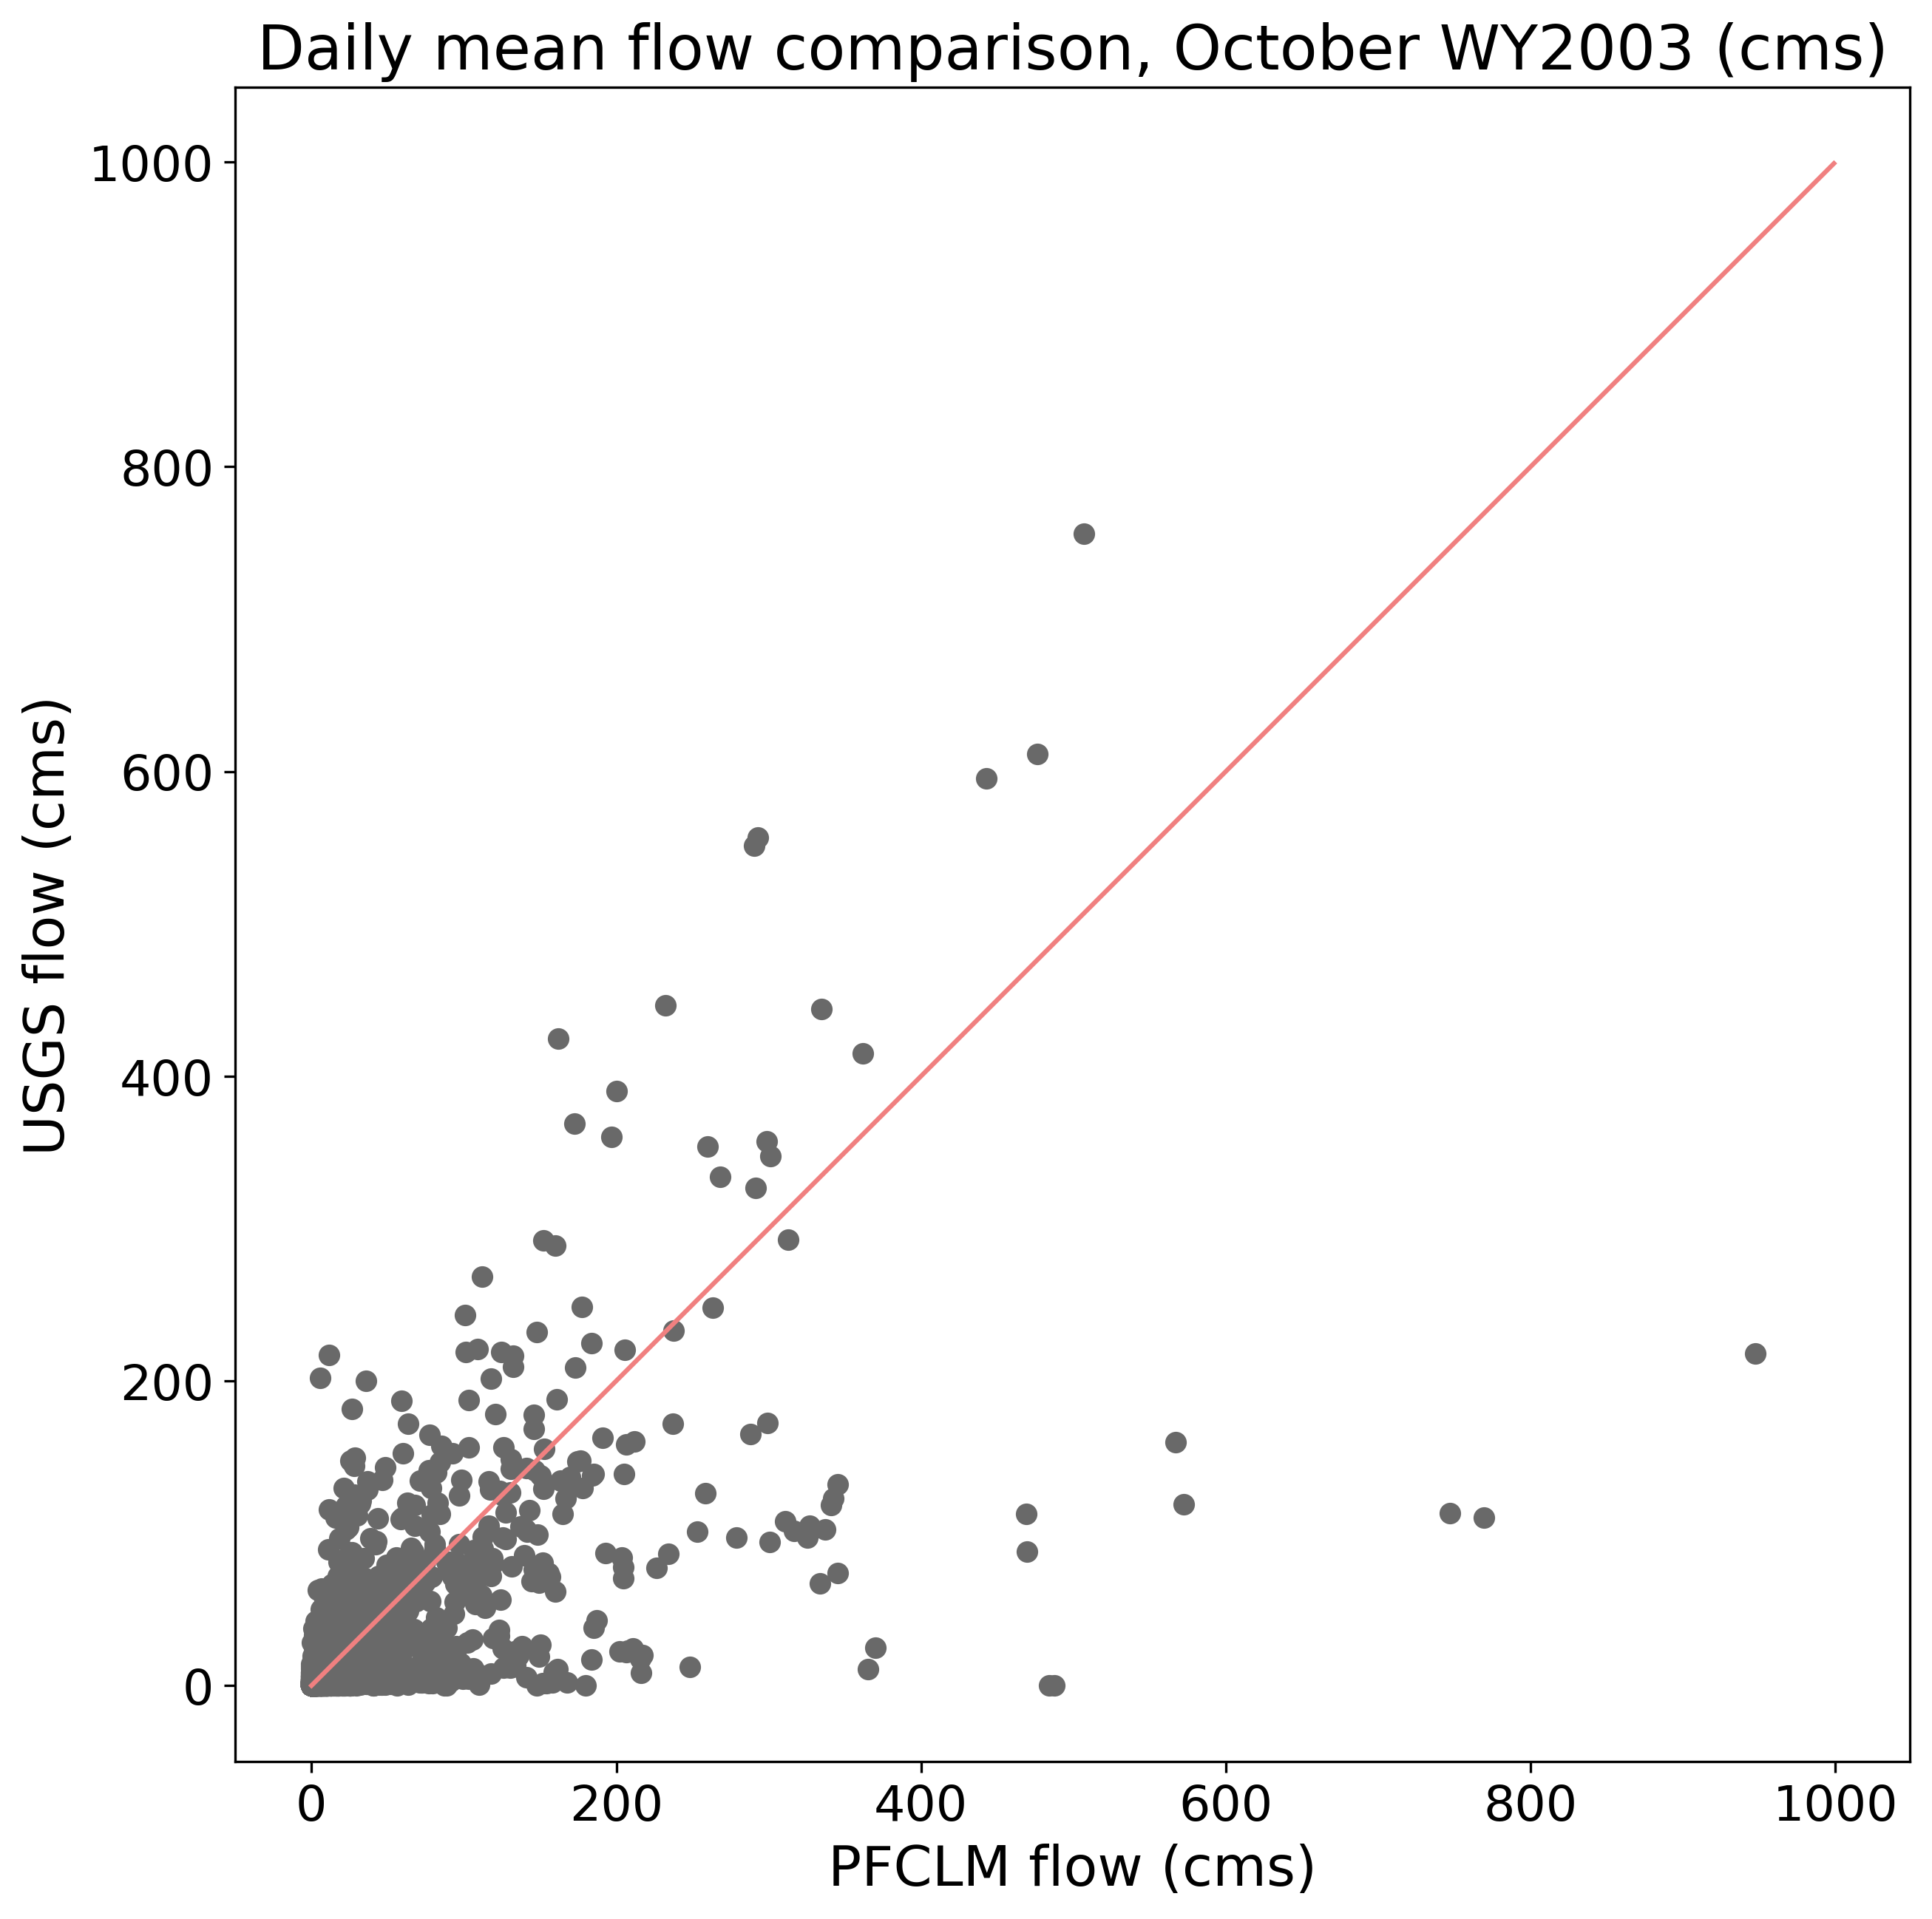

In [41]:
fig = plt.figure(figsize=(10,10), dpi=300)
ax = fig.add_subplot()

ax.scatter(CONUS2_daily_flow['daily mean'],usgs_daily_flow['daily mean'], color = 'dimgrey')
ax.plot(range(1000), color = 'lightcoral')
plt.xlabel('PFCLM flow (cms)',fontsize=18)
plt.ylabel('USGS flow (cms)',fontsize=18)
plt.title('Daily mean flow comparison, October WY2003 (cms)',fontsize=20)
ax.xaxis.set_tick_params(labelsize=16)
ax.yaxis.set_tick_params(labelsize=16)
# square plot
ax.set_aspect('equal', adjustable='box')
plt.savefig(f'{plot_dir}/Oct_WY2003_daily_mean_flow_comparison_scatter.png')




Text(0, 0.5, 'usgs flow')

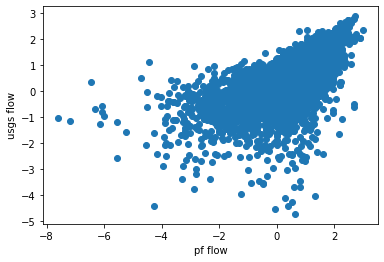

In [38]:
plt.scatter(CONUS2_daily_flow['daily mean log'],usgs_daily_flow['daily mean log'])
plt.xlabel('pf flow')
plt.ylabel('usgs flow')

In [ ]:


### check gage locations for daily flow
NWM_gage_csv = pd.read_csv('/glade/p/univ/ucsm0002/CONUS2/domain_files/NWM_Gage_Adjustments_final.csv')


### set up pandas dataframe of gage ID, lat/long, CONUS2 x and y indices ###
pf_flow_df = pd.DataFrame(columns = ['STNID', 'USGS_lat', 'USGS_lon', 'x_new_adj', 'y_new_adj'])
pf_flow_df['STNID'] = NWM_gage_csv['STNID'].astype(int)
pf_flow_df['USGS_lat'] = NWM_gage_csv['USGS_lat']
pf_flow_df['USGS_lon'] = NWM_gage_csv['USGS_lon']
pf_flow_df['x_new_adj'] = NWM_gage_csv['x_new_adj']
pf_flow_df['y_new_adj'] = NWM_gage_csv['y_new_adj']

# add leading zeros to USGS gages
pf_flow_df['STNID'] = pf_flow_df['STNID'].astype('str').str.zfill(8)

pf_flow_df


In [2]:
### READ STREAMFLOW PFBs ###
# Read in CONUS2 daily streamflow PFBs and save as df in flow_df, convert total accumulated from m^3/h to cms
for i in range(no_days):
    step = str(int(i+1)).rjust(3, '0')
    pf_flow_pfb = np.squeeze(read_pfb(f'{directory_out}/flow.2003.daily.{step}.pfb'))
    pf_flow_df[f'day {step}'] = pf_flow_pfb[pf_flow_df['y_new_adj'],pf_flow_df['x_new_adj']]/3600 # CONVERT FROM m^3/h to cms AND from daily accumulated to daily mean
    print(f'reading flow for day {step} and converting from m^3/h, to total accumulated flow in cms')

    
# Create column for matching/have flow (=1) and not matching/have no flow (=0) gages
pf_flow_df['matched'] = np.where(pf_flow_df['day 001']>0, 1, 0)

# remove cells with no flow and make new pandas df with matching flow at CONUS2 cells and USGS gages
pf_flow_df_NWM_match = pf_flow_df[pf_flow_df.matched != 0]


# SAVE OUT PANDAS DF FOR CONUS2 FLOW
### save csv file of all matching gage locations and CONUS2 daily flow, note the USGS STNID's drop the leading zeros when saving
#pf_flow_df_NWM_match.to_csv(f'{organized_dir}/CONUS2_NWM_matched_TOTAL_flow_{water_year}.csv', sep = ",")

reading flow for day 001 and converting from m^3/h, to total accumulated flow in cms
reading flow for day 002 and converting from m^3/h, to total accumulated flow in cms
reading flow for day 003 and converting from m^3/h, to total accumulated flow in cms
reading flow for day 004 and converting from m^3/h, to total accumulated flow in cms
reading flow for day 005 and converting from m^3/h, to total accumulated flow in cms
reading flow for day 006 and converting from m^3/h, to total accumulated flow in cms
reading flow for day 007 and converting from m^3/h, to total accumulated flow in cms
reading flow for day 008 and converting from m^3/h, to total accumulated flow in cms
reading flow for day 009 and converting from m^3/h, to total accumulated flow in cms
reading flow for day 010 and converting from m^3/h, to total accumulated flow in cms
reading flow for day 011 and converting from m^3/h, to total accumulated flow in cms
reading flow for day 012 and converting from m^3/h, to total accu

In [3]:

pf_total_flow = pf_flow_df_NWM_match.drop(columns=['USGS_lat', 'USGS_lon', 'x_new_adj', 'y_new_adj'])
pf_total_flow.set_index('STNID')
pf_total_flow

,STNID,day 001,day 002,day 003,day 004,day 005,day 006,day 007,day 008,day 009,...,day 023,day 024,day 025,day 026,day 027,day 028,day 029,day 030,day 031,matched
0,01011000,104.138875,93.685551,86.357539,89.755216,83.332608,71.157707,65.082155,60.459544,54.295941,...,226.254651,233.577110,467.999285,535.873752,514.908565,428.964447,381.107336,341.874302,301.612204,1
1,01013500,62.577857,62.210731,65.146245,50.944001,58.231788,42.722279,35.581141,31.382723,28.858195,...,260.186747,246.934975,254.417983,289.471336,396.190879,403.159942,355.667536,317.616464,279.336844,1
2,01015800,84.915776,84.335568,81.351551,72.604003,71.508902,67.064997,60.336367,53.831636,49.410542,...,794.024218,921.686099,844.421531,729.207240,652.812615,546.739258,488.153785,452.013008,410.575909,1
3,01017000,203.392825,205.892148,202.399688,194.883917,186.881342,173.613349,159.315411,145.690578,134.605796,...,798.649381,1116.189330,1179.405589,1281.845249,1412.047624,1371.641344,1294.506694,1200.212774,1065.438329,1
4,01017060,224.770162,221.520523,212.318014,213.279950,215.939769,206.290573,203.603639,191.654219,177.038298,...,650.843051,737.199216,1149.077280,1326.810405,1468.564500,1593.794153,1573.362302,1469.713345,1357.545805,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7530,11313440,1218.568047,1190.719750,1153.507556,1104.073761,1042.588224,981.011523,925.012401,873.586858,820.887634,...,214.809683,194.473371,176.742459,160.753367,145.249387,131.104169,118.279435,106.413686,95.697667,1
7531,11425500,2787.563538,2709.779108,2625.148299,2520.512026,2396.159632,2270.230640,2141.288712,1991.940310,1818.680101,...,451.216763,407.606768,369.722228,336.132442,305.936974,278.926985,254.984601,233.367491,214.111760,1
7533,11447830,3356.996642,3268.749704,3157.039785,3049.394150,2921.075396,2766.894153,2600.246077,2435.978238,2268.971307,...,596.441690,541.647768,492.351516,448.127426,407.356986,370.697638,338.464133,309.672529,284.001327,1
7536,11447850,3366.685587,3289.070727,3181.054869,3073.903314,2953.343154,2806.295969,2642.102526,2478.114027,2314.467299,...,622.589737,566.223778,515.612680,469.651115,427.079216,388.868519,355.047508,324.820939,297.812693,1


In [ ]:
###
### read in csv that was just created of gage locations and CONUS2 flow
pf_flow_df = pd.read_csv(f'{organized_dir}/CONUS2_NWM_matched_flow_{water_year}.csv',index_col=['STNID'])
pf_flow_df = pf_flow_df.drop(columns=['Unnamed: 0','matched']) #drop unnecessary columns for now
pf_flow_df.index.names = ['site_id']
                          
### read in USGS flow for all gages with flow in October
# streamflow from hydrodata has already been converted to cms!!!
usgs_flow_df = pd.read_csv(f'{organized_dir}/{usgs_data}',index_col=['site_id']) 
usgs_flow_df = usgs_flow_df.drop(columns=['Unnamed: 0', 'num_obs'])
                          
# merge the CONUS2 and USGS dataframes so that we remove all gage locations that don't match between the two
combine_df = pf_flow_df.merge(usgs_flow_df, on='site_id', how='inner')
combine_df


In [ ]:
#********* FIX these next lines, the dates are hardcoded in ************
# separate the CONUS2 flow from the USGS flow in the combine_df
pf_flow_matched = pd.DataFrame(combine_df.iloc[:,0:35]) # get only CONUS2 flow
usgs_flow_matched = pd.DataFrame(combine_df.iloc[:,35:66]) #get only USGS flow 

# Save Flow Matched CSVs
pf_flow_matched.to_csv(f'{organized_dir}/CONUS2_daily_FlowMatch_cms_{water_year}.csv', sep = ",")
usgs_flow_matched.to_csv(f'{organized_dir}/USGS_daily_FlowMatch_cms_{water_year}.csv', sep = ",")